# Importing Required Libraries

In [ ]:
! pip install imblearn
! pip install streamlit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# About Dataset

The data set includes the following variables:

● state: Categorical, for the 51 states and the District of Columbia.

● Area.code

● account.length: how long the account has been active.

● voice.plan: yes or no, voicemail plan.

● voice.messages: number of voicemail messages.

● intl.plan: yes or no, international plan.

● intl.mins: minutes customer used service to make international calls.

● intl.calls: total number of international calls.

● intl.charge: total international charge.

● day.mins: minutes customer used service during the day.

● day.calls: total number of calls during the day.

● day.charge: total charge during the day.

● eve.mins: minutes customer used service during the evening.

● eve.calls: total number of calls during the evening.

● eve.charge: total charge during the evening.

● night.mins: minutes customer used service during the night.

● night.calls: total number of calls during the night.

● night.charge: total charge during the night.

● customer.calls: number of calls to customer service.

● churn: Categorical, yes or no. Indicator of whether the customer has
left the company (yes or no).

# EDA
  - Importing Dataset
  - Renaming Columns
  - Checking for Duplicated Values
  - Gathering Information about Dataset
  - Checking for Null Values in Dataset and Replacing with Mean of the Feature

In [ ]:
# Load the dataset
churn=pd.read_csv('Churn.csv')
# Initial data inspection
churn

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
#Dropping the unnamed column that is of no use to us.
churn = churn.drop('Unnamed: 0', axis=1)

In [ ]:
# Rename all . characters in the column names with _.


churn.rename(columns={'state':'State','area.code': 'Area','account.length': 'Account_Length','voice.plan': 'Voice_Plan',
                      'voice.messages': 'Voice_Messages','intl.plan':'International_Plan',
                      'intl.mins':'International_Mins','intl.calls':'International_Calls',
                      'intl.charge':'International_Charges','day.mins':'Day_Mins','day.calls':'Day_Calls',
                      'day.charge':'Day_Charges', 'eve.mins':'Evening_Mins', 'eve.calls':'Evening_Calls',
                      'eve.charge':'Evening_Charges', 'night.mins':'Night_Mins', 'night.calls':'Night_Calls',
                      'night.charge':'Night_Charges','customer.calls':'Customer_Calls','churn':'Churn'},inplace=True)


In [ ]:
# Check for duplicate values in each column
churn[churn.duplicated()]

,State,Area,Account_Length,Voice_Plan,Voice_Messages,International_Plan,International_Mins,International_Calls,International_Charges,Day_Mins,Day_Calls,Day_Charges,Evening_Mins,Evening_Calls,Evening_Charges,Night_Mins,Night_Calls,Night_Charges,Customer_Calls,Churn


In [ ]:
 #Gathering Information about Features
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  5000 non-null   object 
 1   Area                   5000 non-null   object 
 2   Account_Length         5000 non-null   int64  
 3   Voice_Plan             5000 non-null   object 
 4   Voice_Messages         5000 non-null   int64  
 5   International_Plan     5000 non-null   object 
 6   International_Mins     5000 non-null   float64
 7   International_Calls    5000 non-null   int64  
 8   International_Charges  5000 non-null   float64
 9   Day_Mins               5000 non-null   float64
 10  Day_Calls              5000 non-null   int64  
 11  Day_Charges            5000 non-null   object 
 12  Evening_Mins           5000 non-null   object 
 13  Evening_Calls          5000 non-null   int64  
 14  Evening_Charges        5000 non-null   float64
 15  Nigh

In [ ]:
# Import the 'LabelEncoder' class from 'sklearn.preprocessing'
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'Day_Charges' column to the float data type
churn['Day_Charges'] = churn['Day_Charges'].astype(float)

# Convert the 'Evening_Mins' column to the float data type
churn['Evening_Mins'] = churn['Evening_Mins'].astype(float)

# Apply label encoding to specific columns in the 'churn' DataFrame
# Label encoding is typically used for converting categorical variables into numerical form.
# However, in this code, it appears that label encoding is not applied to any columns yet.
# You may need to specify the columns and perform label encoding separately if needed.

# Print information about the 'churn' DataFrame to inspect the data types and encoding (if any)
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  5000 non-null   object 
 1   Area                   5000 non-null   object 
 2   Account_Length         5000 non-null   int64  
 3   Voice_Plan             5000 non-null   object 
 4   Voice_Messages         5000 non-null   int64  
 5   International_Plan     5000 non-null   object 
 6   International_Mins     5000 non-null   float64
 7   International_Calls    5000 non-null   int64  
 8   International_Charges  5000 non-null   float64
 9   Day_Mins               5000 non-null   float64
 10  Day_Calls              5000 non-null   int64  
 11  Day_Charges            4993 non-null   float64
 12  Evening_Mins           4976 non-null   float64
 13  Evening_Calls          5000 non-null   int64  
 14  Evening_Charges        5000 non-null   float64
 15  Nigh

In [ ]:
# null values
churn.isna().sum()

State                     0
Area                      0
Account_Length            0
Voice_Plan                0
Voice_Messages            0
International_Plan        0
International_Mins        0
International_Calls       0
International_Charges     0
Day_Mins                  0
Day_Calls                 0
Day_Charges               7
Evening_Mins             24
Evening_Calls             0
Evening_Charges           0
Night_Mins                0
Night_Calls               0
Night_Charges             0
Customer_Calls            0
Churn                     0
dtype: int64

In [ ]:
# Replace null values with the mean value of each column
churn["Day_Charges"].fillna(churn['Day_Charges'].mean(), inplace = True)
churn["Evening_Mins"].fillna(churn['Evening_Mins'].mean(), inplace = True)

churn.isna().sum()

State                    0
Area                     0
Account_Length           0
Voice_Plan               0
Voice_Messages           0
International_Plan       0
International_Mins       0
International_Calls      0
International_Charges    0
Day_Mins                 0
Day_Calls                0
Day_Charges              0
Evening_Mins             0
Evening_Calls            0
Evening_Charges          0
Night_Mins               0
Night_Calls              0
Night_Charges            0
Customer_Calls           0
Churn                    0
dtype: int64

# VISUALIZATIONS And REMOVING OUTLIERS
- Histograms of all Features except States, Area Code and Categorical Features.
- Boxplots to check if there are any outliers in Dataset.
- Removal of outliers using Inter Quartile Range Method and Distribution Plots.
- Histograms to check if most of the columns follow Normal Distribution or not after removing outliers.
- Boxplot to check if most of the outliers are removed.
- Bar plot to check the number of Records based on Area Code.
- Bar plot to check the Churn Rate in every State.
- Bar Plot to check Churn Rate based on Area Code.
- Bar Plot to check Churn Rate based on Voice Plan.
- Bar Plot to check Churn Rate based on International Plan.
- Correlation Matrix to check Correlation of Features with Churn

array([[<AxesSubplot:title={'center':'Account_Length'}>,
        <AxesSubplot:title={'center':'Voice_Messages'}>,
        <AxesSubplot:title={'center':'International_Mins'}>,
        <AxesSubplot:title={'center':'International_Calls'}>],
       [<AxesSubplot:title={'center':'International_Charges'}>,
        <AxesSubplot:title={'center':'Day_Mins'}>,
        <AxesSubplot:title={'center':'Day_Calls'}>,
        <AxesSubplot:title={'center':'Day_Charges'}>],
       [<AxesSubplot:title={'center':'Evening_Mins'}>,
        <AxesSubplot:title={'center':'Evening_Calls'}>,
        <AxesSubplot:title={'center':'Evening_Charges'}>,
        <AxesSubplot:title={'center':'Night_Mins'}>],
       [<AxesSubplot:title={'center':'Night_Calls'}>,
        <AxesSubplot:title={'center':'Night_Charges'}>,
        <AxesSubplot:title={'center':'Customer_Calls'}>, <AxesSubplot:>]],
      dtype=object)

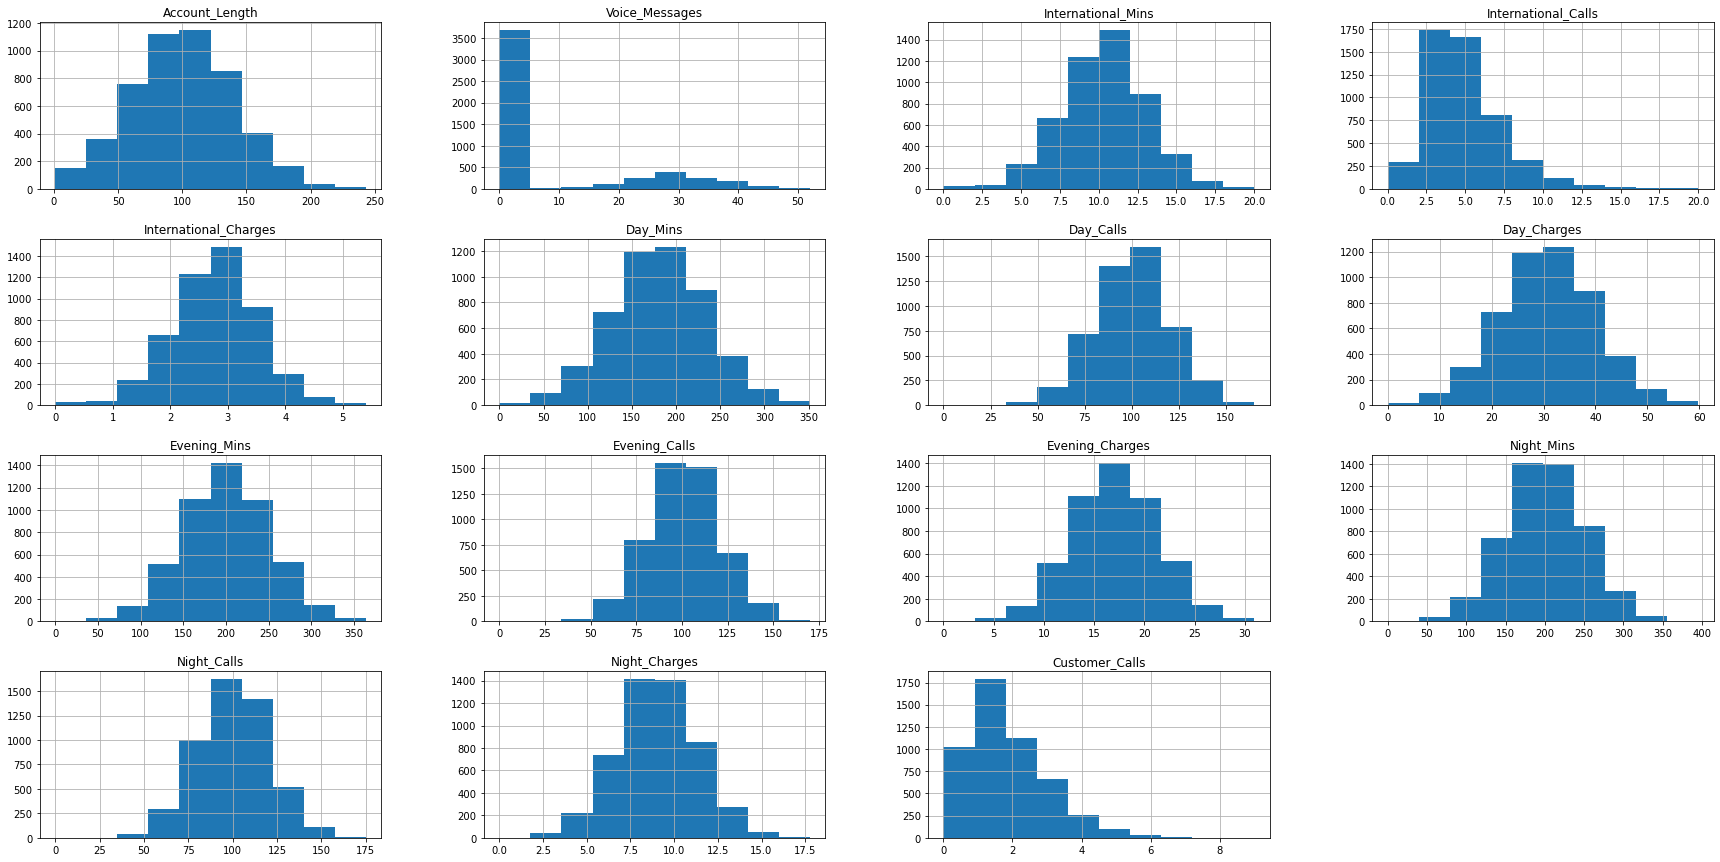

In [ ]:
# Drawing Histogram of Features in Dataset to understand the Features
churn.hist(figsize=(30,15))

<AxesSubplot:>

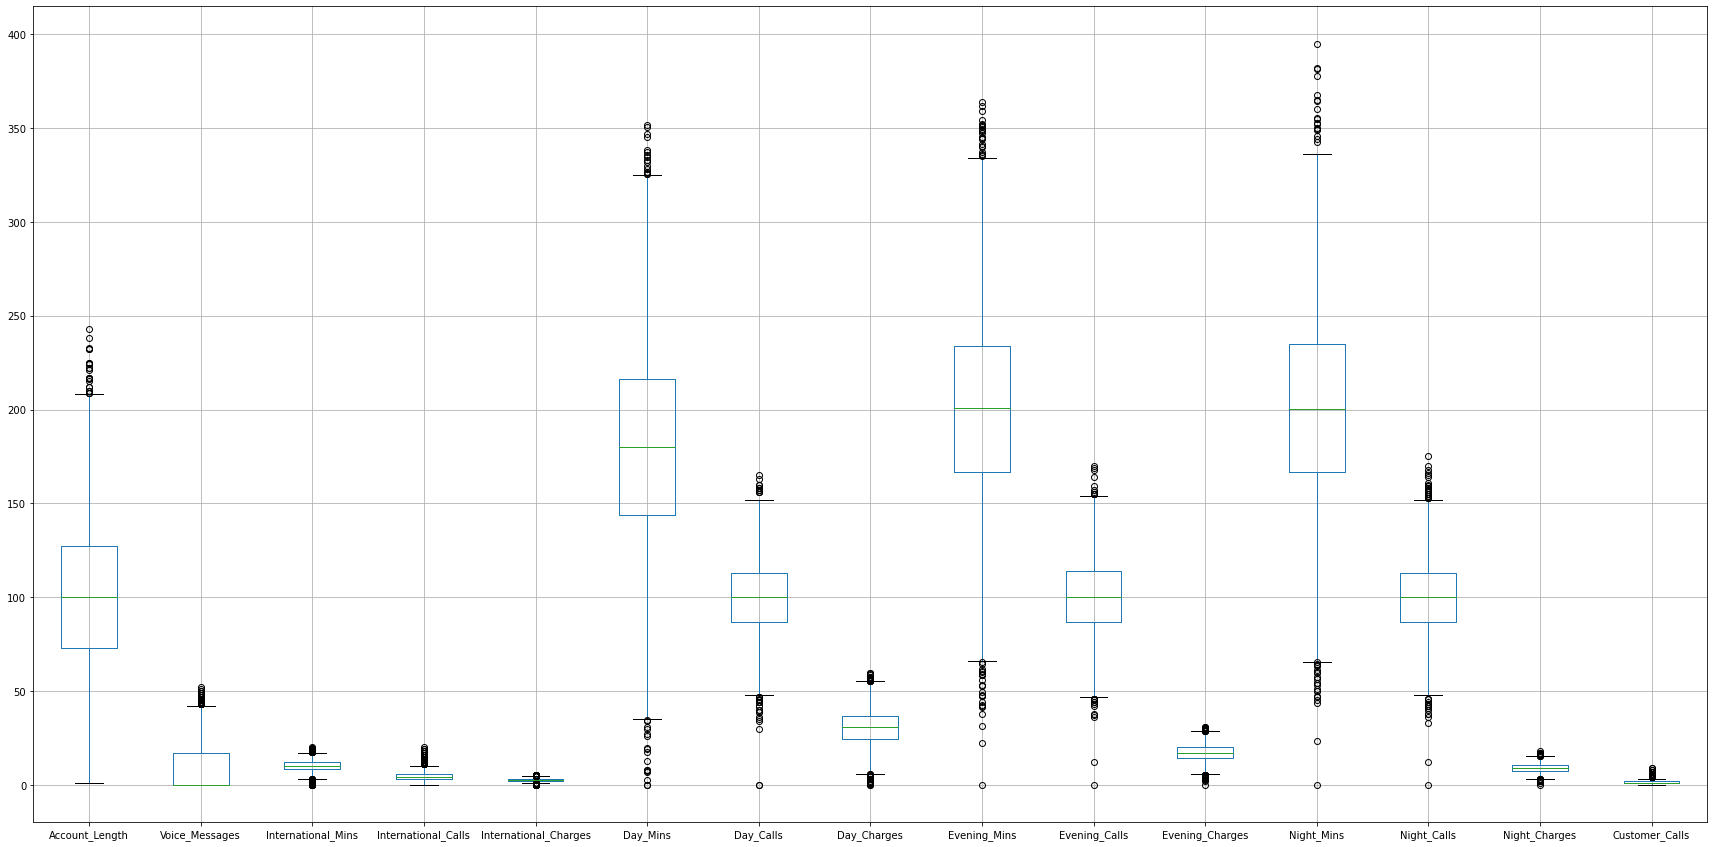

In [ ]:
churn.boxplot(figsize=(30,15))

In [ ]:
# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Account_Length'].quantile(0.25)
Q3 = churn['Account_Length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Account_Length'] >upper].index,inplace=True)
churn.drop(churn[churn['Account_Length'] <lower].index,inplace=True)
churn.shape

(4976, 20)

<AxesSubplot:xlabel='Account_Length', ylabel='Density'>

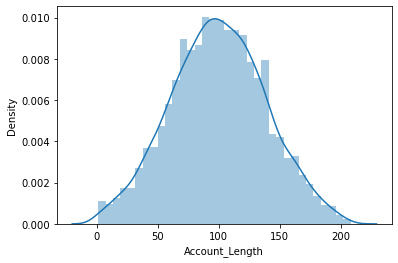

In [ ]:
sns.distplot(churn['Account_Length'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method

Q1 = churn['Voice_Messages'].quantile(0.25)
Q3 = churn['Voice_Messages'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Voice_Messages'] >upper].index,inplace=True)
churn.drop(churn[churn['Voice_Messages'] <lower].index,inplace=True)
churn.shape

(4916, 20)

<AxesSubplot:xlabel='Voice_Messages', ylabel='Density'>

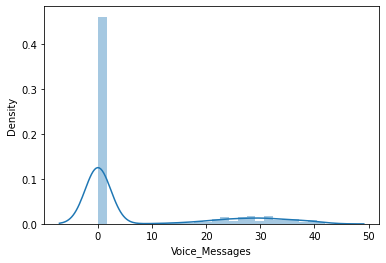

In [ ]:
sns.distplot(churn['Voice_Messages'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['International_Mins'].quantile(0.25)
Q3 = churn['International_Mins'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['International_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Mins'] <lower].index,inplace=True)
churn.shape

(4851, 20)

<AxesSubplot:xlabel='International_Mins', ylabel='Density'>

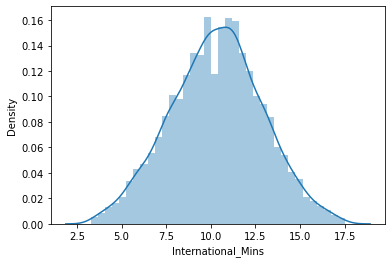

In [ ]:
sns.distplot(churn['International_Mins'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['International_Calls'].quantile(0.25)
Q3 = churn['International_Calls'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['International_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Calls'] <lower].index,inplace=True)
churn.shape

(4736, 20)

<AxesSubplot:xlabel='International_Calls', ylabel='Density'>

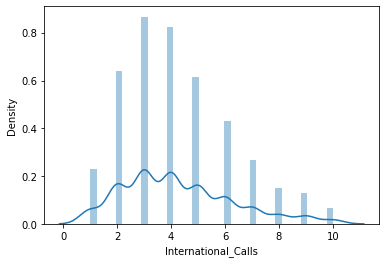

In [ ]:
sns.distplot(churn['International_Calls'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['International_Charges'].quantile(0.25)
Q3 = churn['International_Charges'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['International_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Charges'] <lower].index,inplace=True)
churn.shape

(4723, 20)

<AxesSubplot:xlabel='International_Charges', ylabel='Density'>

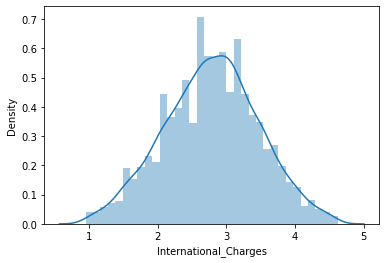

In [ ]:
sns.distplot(churn['International_Charges'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Day_Mins'].quantile(0.25)
Q3 = churn['Day_Mins'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Day_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Mins'] <lower].index,inplace=True)
churn.shape

(4692, 20)

<AxesSubplot:xlabel='Day_Mins', ylabel='Density'>

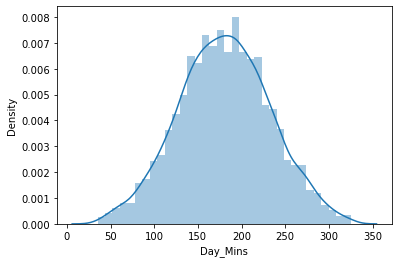

In [ ]:
sns.distplot(churn['Day_Mins'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Day_Calls'].quantile(0.25)
Q3 = churn['Day_Calls'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Day_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Calls'] <lower].index,inplace=True)
churn.shape

(4660, 20)

<AxesSubplot:xlabel='Day_Calls', ylabel='Density'>

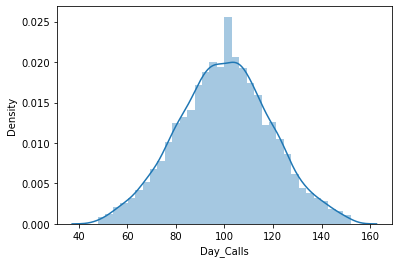

In [ ]:
sns.distplot(churn['Day_Calls'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Day_Charges'].quantile(0.25)
Q3 = churn['Day_Charges'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Day_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Charges'] <lower].index,inplace=True)
churn.shape

(4655, 20)

<AxesSubplot:xlabel='Day_Charges', ylabel='Density'>

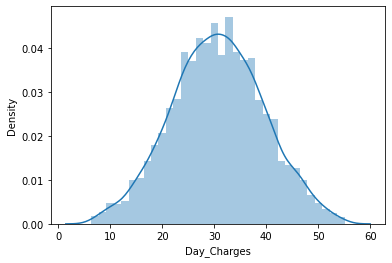

In [ ]:
sns.distplot(churn['Day_Charges'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Evening_Mins'].quantile(0.25)
Q3 = churn['Evening_Mins'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Evening_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Mins'] <lower].index,inplace=True)
churn.shape

(4611, 20)

<AxesSubplot:xlabel='Evening_Mins', ylabel='Density'>

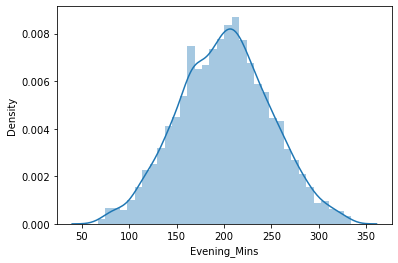

In [ ]:
sns.distplot(churn['Evening_Mins'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Evening_Calls'].quantile(0.25)
Q3 = churn['Evening_Calls'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Evening_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Calls'] <lower].index,inplace=True)
churn.shape

(4579, 20)

<AxesSubplot:xlabel='Evening_Calls', ylabel='Density'>

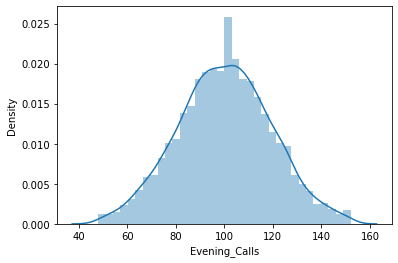

In [ ]:
sns.distplot(churn['Evening_Calls'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Evening_Charges'].quantile(0.25)
Q3 = churn['Evening_Charges'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Evening_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Charges'] <lower].index,inplace=True)
churn.shape

(4576, 20)

<AxesSubplot:xlabel='Evening_Charges', ylabel='Density'>

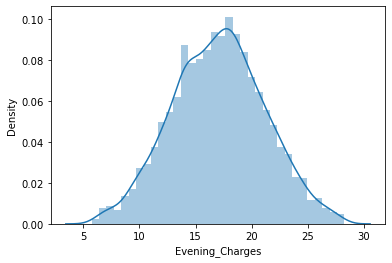

In [ ]:
sns.distplot(churn['Evening_Charges'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Night_Mins'].quantile(0.25)
Q3 = churn['Night_Mins'].quantile(0.75)

IQR= Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Night_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Mins'] <lower].index,inplace=True)
churn.shape


(4539, 20)

<AxesSubplot:xlabel='Night_Mins', ylabel='Density'>

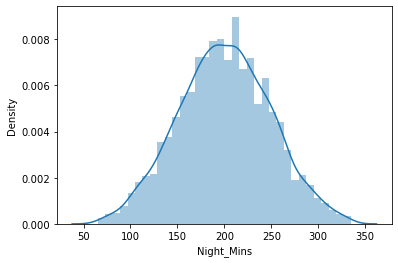

In [ ]:
sns.distplot(churn['Night_Mins'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Night_Calls'].quantile(0.25)
Q3 = churn['Night_Calls'].quantile(0.75)

IQR= Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Night_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Calls'] <lower].index,inplace=True)
churn.shape

(4503, 20)

<AxesSubplot:xlabel='Night_Calls', ylabel='Density'>

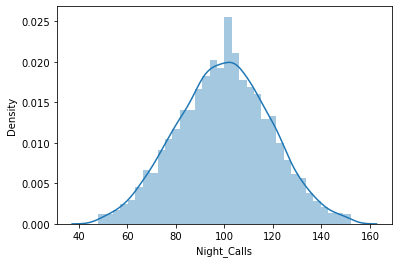

In [ ]:
sns.distplot(churn['Night_Calls'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Night_Charges'].quantile(0.25)
Q3 = churn['Night_Charges'].quantile(0.75)

IQR= Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

churn.drop(churn[churn['Night_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Charges'] <lower].index,inplace=True)
churn.shape

(4500, 20)

<AxesSubplot:xlabel='Night_Charges', ylabel='Density'>

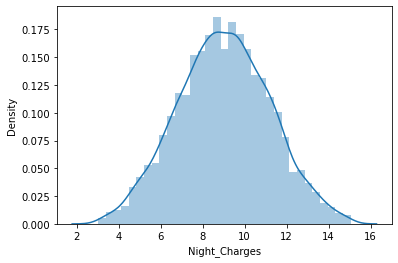

In [ ]:
sns.distplot(churn['Night_Charges'])

In [ ]:

# Calculate lower and upper bounds for outliers using IQR method
Q1 = churn['Customer_Calls'].quantile(0.25)
Q3 = churn['Customer_Calls'].quantile(0.75)

IQR= Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(upper)
print(lower)

churn.drop(churn[churn['Customer_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Customer_Calls'] <lower].index,inplace=True)
churn.shape

3.5
-0.5


(4137, 20)

<AxesSubplot:xlabel='Customer_Calls', ylabel='Density'>

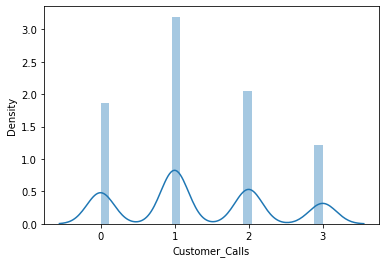

In [ ]:
sns.distplot(churn['Customer_Calls'])

In [ ]:
churn

,State,Area,Account_Length,Voice_Plan,Voice_Messages,International_Plan,International_Mins,International_Calls,International_Charges,Day_Mins,Day_Calls,Day_Charges,Evening_Mins,Evening_Calls,Evening_Charges,Night_Mins,Night_Calls,Night_Charges,Customer_Calls,Churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
5,AL,area_code_510,118,no,0,yes,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


array([[<AxesSubplot:title={'center':'Account_Length'}>,
        <AxesSubplot:title={'center':'Voice_Messages'}>,
        <AxesSubplot:title={'center':'International_Mins'}>,
        <AxesSubplot:title={'center':'International_Calls'}>],
       [<AxesSubplot:title={'center':'International_Charges'}>,
        <AxesSubplot:title={'center':'Day_Mins'}>,
        <AxesSubplot:title={'center':'Day_Calls'}>,
        <AxesSubplot:title={'center':'Day_Charges'}>],
       [<AxesSubplot:title={'center':'Evening_Mins'}>,
        <AxesSubplot:title={'center':'Evening_Calls'}>,
        <AxesSubplot:title={'center':'Evening_Charges'}>,
        <AxesSubplot:title={'center':'Night_Mins'}>],
       [<AxesSubplot:title={'center':'Night_Calls'}>,
        <AxesSubplot:title={'center':'Night_Charges'}>,
        <AxesSubplot:title={'center':'Customer_Calls'}>, <AxesSubplot:>]],
      dtype=object)

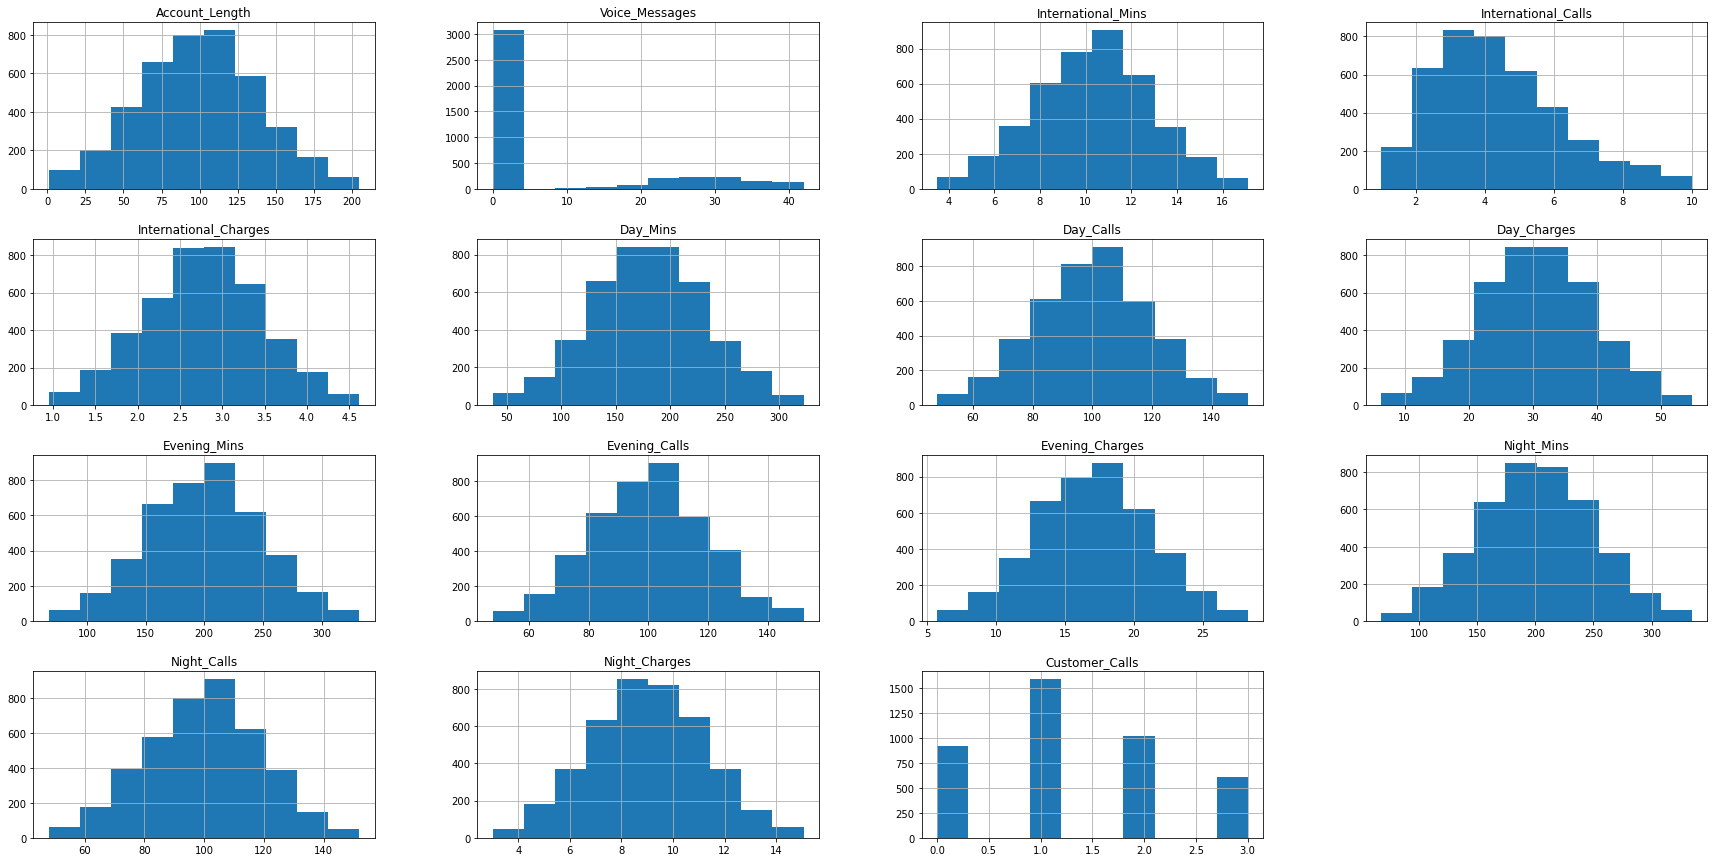

In [ ]:
# Histogram After Removing Outliers from Dataset
churn.hist(figsize=(30,15))

<AxesSubplot:xlabel='Area', ylabel='count'>

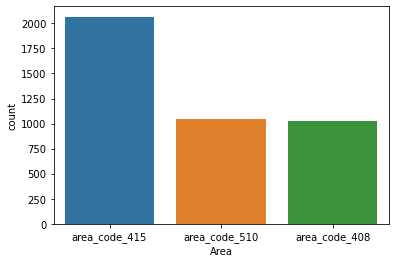

In [ ]:
# Creating Countplot to visualize the Distribution of Records vs Area Code
sns.countplot(churn['Area'])

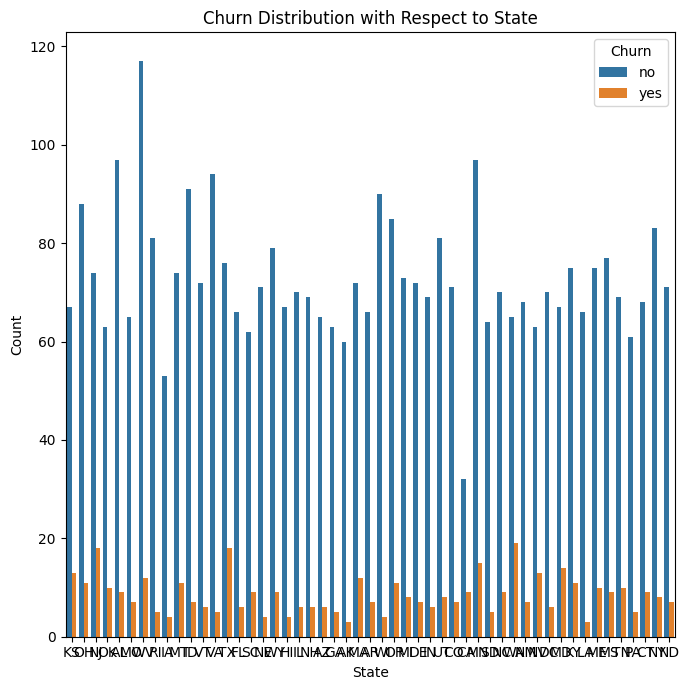

In [ ]:
# Create a countplot to visualize the distribution of 'Churn' with respect to 'State' in the 'churn' dataset

plt.figure(figsize=(7,7))
sns.countplot(data=churn, x='State', hue='Churn')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Churn Distribution with Respect to State')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

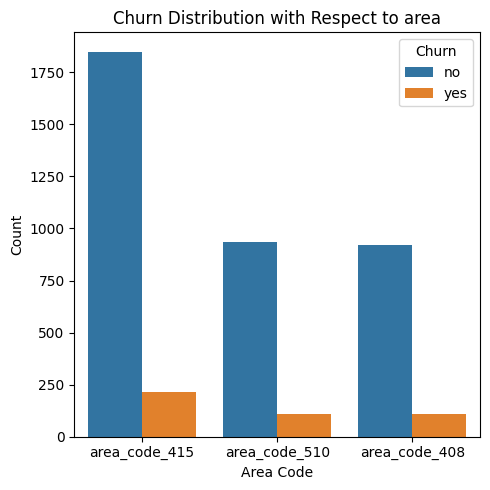

In [ ]:
# Create a countplot to visualize the distribution of 'Churn' with respect to 'Area' in the 'churn' dataset

plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='Area', hue='Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Churn Distribution with Respect to area')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

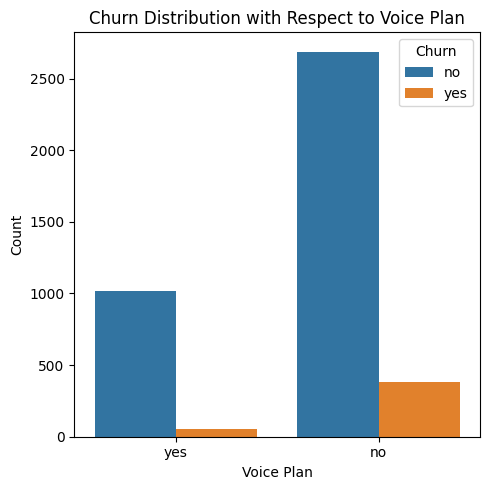

In [ ]:
# Create a countplot to visualize the distribution of 'Churn' with respect to 'Voice_Plan' in the 'churn' dataset

plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='Voice_Plan', hue='Churn')
plt.xlabel('Voice Plan')
plt.ylabel('Count')
plt.title('Churn Distribution with Respect to Voice Plan')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

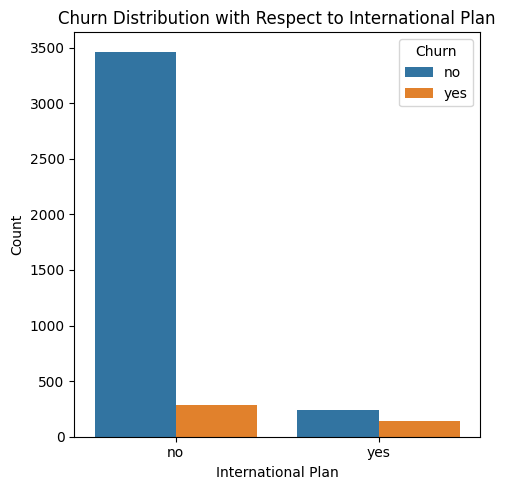

In [ ]:
# Create a countplot to visualize the distribution of 'Churn' with respect to 'International_Plan' in the 'churn' dataset

plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='International_Plan', hue='Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('Churn Distribution with Respect to International Plan')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
churn['Voice_Plan']=label_encoder.fit_transform(churn['Voice_Plan'])
churn['International_Plan']=label_encoder.fit_transform(churn['International_Plan'])
churn['Churn']=label_encoder.fit_transform(churn['Churn'])

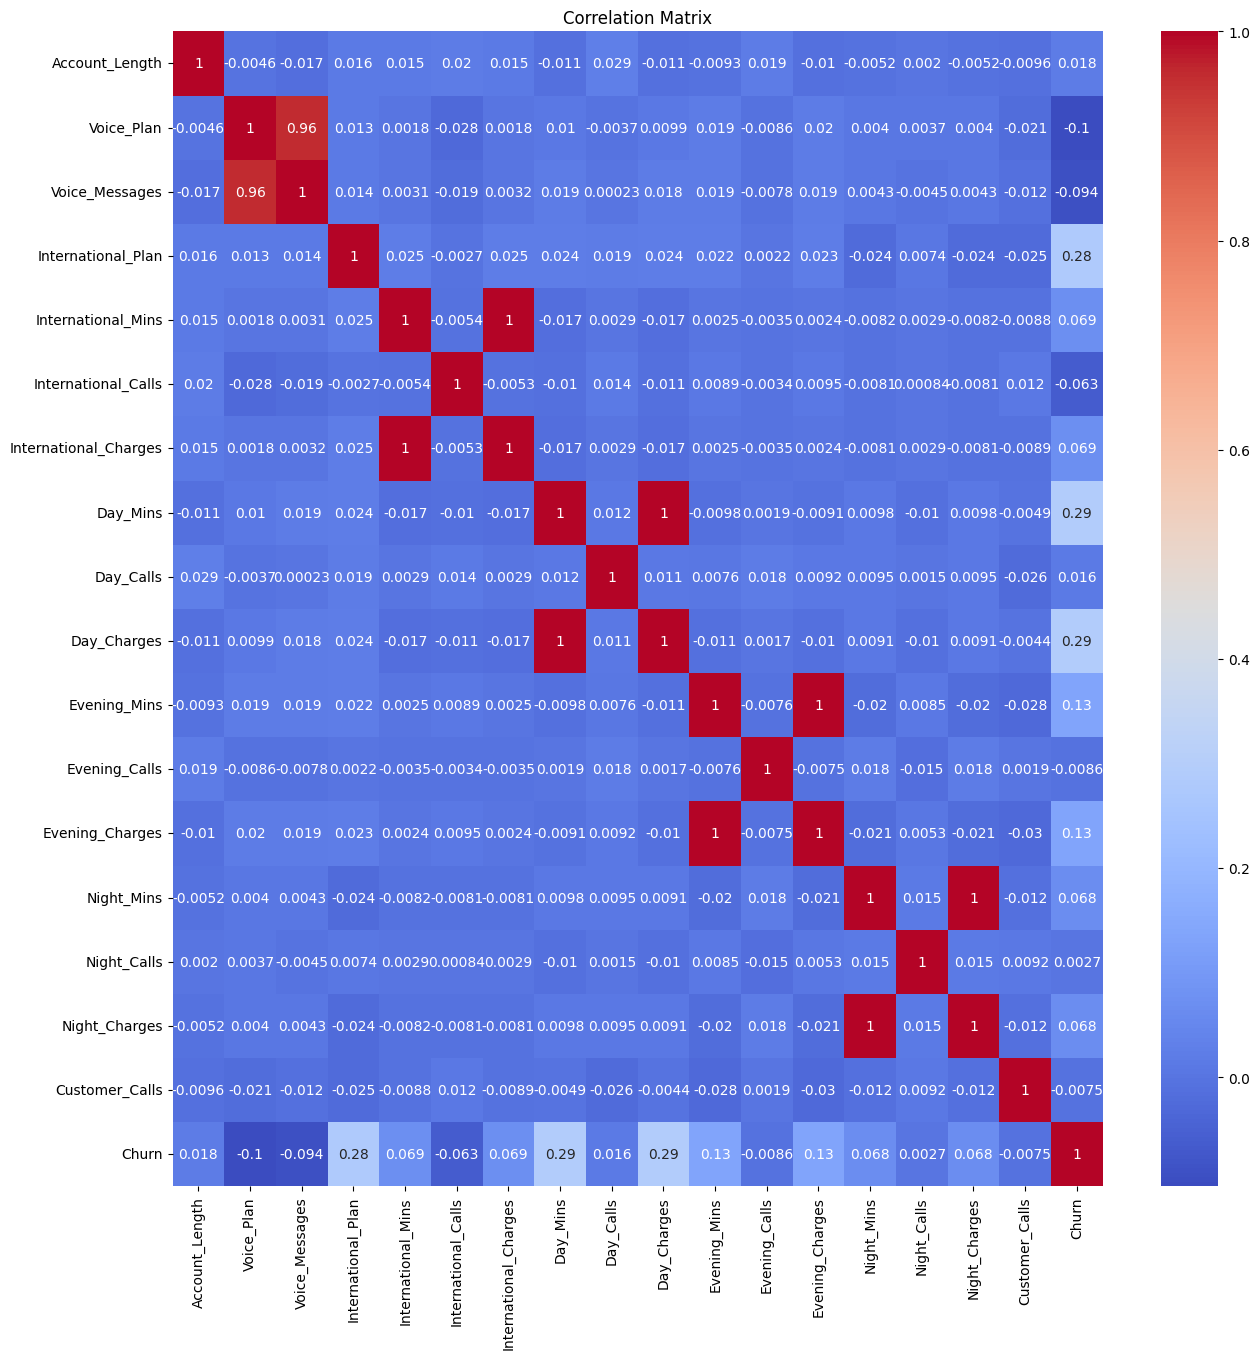

In [ ]:
# Creating a Correlation Matrix to check if there is any correlation between Features

correlation=churn.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# FEATURES EXTRACTION
- Normalizing The Dataset.
- Finding Important Features Using Ordinary Least Square Method.
- Finding P[t] Values for the features who are having Correlation using Ordinary Least Square Method.
- Finalizing 7 Features whuch are important for Prediction of Churn.
- Calculating VIF Values for the 7 selected Features.
- Re-evaluating the Chosen Features using Select K Best Method.

In [ ]:
# Define a function 'norm_churn' for normalizing a given DataFrame 'i'
def norm_churn(i):
    # Calculate normalized values by scaling each column in 'i' between 0 and 1
    x = (i - i.min()) / (i.max() - i.min())
    return x

# Apply the 'norm_churn' function to normalize the numerical columns in the 'churn' dataset (columns from index 3 onwards)
# Store the normalized dataset in 'churn_norm'
churn_norm = norm_churn(churn.iloc[:, 3:])

In [ ]:
# Fit a linear regression model using the statsmodels library to analyze the relationship between 'Churn' and multiple predictor variables
# The formula 'Churn ~ ...' specifies the linear regression model with 'Churn' as the dependent variable and a list of predictor variables.
# 'data=churn_norm' indicates that the data for modeling is taken from the 'churn_norm' DataFrame.

model=smf.ols('Churn~Account_Length+Voice_Plan+Voice_Messages+International_Plan+International_Mins+International_Calls+International_Charges+Day_Mins+Day_Calls+Day_Charges+Evening_Mins+Evening_Calls+Evening_Charges+Night_Mins+Night_Calls+Night_Charges+Customer_Calls',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     62.85
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.95e-191
Time:                        06:36:34   Log-Likelihood:                -495.82
No. Observations:                4137   AIC:                             1028.
Df Residuals:                    4119   BIC:                             1142.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5224      0.053     -9.840      0.000      -0.626      -0.418
Account_Length            0.0001      0.000      1.360      0.174   -6.52e-05       0.000
Voice_Plan               -0.1106      0.035     -3.187      0.001      -0.179      -0.043
Voice_Messages            0.0010      0.001      0.896      0.370      -0.001       0.003
International_Plan        0.2889      0.015     19.679      0.000       0.260       0.318
International_Mins       -0.0381      0.401     -0.095      0.924      -0.823       0.747
International_Calls      -0.0094      0.002     -4.578      0.000      -0.013      -0.005
International_Charges     0.1708      1.484      0.115      0.908      -2.738       3.080
Day_Mins                  0.0008      0.003      0.226      0.821      -0.006       0.007
Day_Calls              9.008e-05      0.000      0.406      0.685      -0.000       0.001
Day_Charges               0.0055      0.020      0.279      0.780      -0.033       0.044
Evening_Mins              0.0009      0.001      0.776      0.438      -0.001       0.003
Evening_Calls            -0.0002      0.000     -0.792      0.428      -0.001       0.000
Evening_Charges          -0.0005      0.014     -0.040      0.968      -0.027       0.026
Night_Mins                0.0701      0.067      1.046      0.296      -0.061       0.202
Night_Calls            2.157e-05      0.000      0.097      0.923      -0.000       0.000
Night_Charges            -1.5477      1.489     -1.039      0.299      -4.468       1.372
Customer_Calls            0.0014      0.004      0.310      0.757      -0.007       0.010
==============================================================================
Omnibus:                     1460.103   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4382.469
Skew:                           1.859   Prob(JB):                         0.00
Kurtosis:                       6.407   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Fit a linear regression model using the statsmodels library to analyze the relationship between 'Churn' and a single predictor variable.

model=smf.ols('Churn~International_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.00
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           7.96e-06
Time:                        06:36:34   Log-Likelihood:                -962.90
No. Observations:                4137   AIC:                             1930.
Df Residuals:                    4135   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0189      0.020      0.957      0.339      -0.020       0.058
International_Mins     0.0083      0.002      4.472      0.000       0.005       0.012
==============================================================================
Omnibus:                     2037.400   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8226.843
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Fit a linear regression model using the statsmodels library to analyze the relationship between 'Churn' and a single predictor variable.

model=smf.ols('Churn~International_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.99
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           7.97e-06
Time:                        06:36:34   Log-Likelihood:                -962.90
No. Observations:                4137   AIC:                             1930.
Df Residuals:                    4135   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0189      0.020      0.956      0.339      -0.020       0.058
International_Charges     0.0308      0.007      4.472      0.000       0.017       0.044
==============================================================================
Omnibus:                     2037.403   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8226.866
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Day_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     384.5
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           6.16e-82
Time:                        06:36:34   Log-Likelihood:                -788.96
No. Observations:                4137   AIC:                             1582.
Df Residuals:                    4135   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2036      0.016    -12.439      0.000      -0.236      -0.171
Day_Mins       0.0017   8.72e-05     19.609      0.000       0.002       0.002
==============================================================================
Omnibus:                     1827.411   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.771
Skew:                           2.303   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Day_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     384.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           7.02e-82
Time:                        06:36:34   Log-Likelihood:                -789.09
No. Observations:                4137   AIC:                             1582.
Df Residuals:                    4135   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2036      0.016    -12.436      0.000      -0.236      -0.172
Day_Charges     0.0101      0.001     19.602      0.000       0.009       0.011
==============================================================================
Omnibus:                     1827.657   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6590.669
Skew:                           2.304   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Evening_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     75.18
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           6.08e-18
Time:                        06:36:34   Log-Likelihood:                -935.61
No. Observations:                4137   AIC:                             1875.
Df Residuals:                    4135   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0641      0.020     -3.200      0.001      -0.103      -0.025
Evening_Mins     0.0008    9.7e-05      8.670      0.000       0.001       0.001
==============================================================================
Omnibus:                     1994.855   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7849.128
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                       7.502   Cond. No.                         876.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Evening_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     75.28
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           5.78e-18
Time:                        06:36:34   Log-Likelihood:                -935.56
No. Observations:                4137   AIC:                             1875.
Df Residuals:                    4135   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0638      0.020     -3.192      0.001      -0.103      -0.025
Evening_Charges     0.0099      0.001      8.676      0.000       0.008       0.012
==============================================================================
Omnibus:                     1994.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7847.363
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                       7.502   Cond. No.                         74.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Night_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.13
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.25e-05
Time:                        06:36:34   Log-Likelihood:                -963.33
No. Observations:                4137   AIC:                             1931.
Df Residuals:                    4135   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0194      0.020      0.966      0.334      -0.020       0.059
Night_Mins     0.0004   9.72e-05      4.373      0.000       0.000       0.001
==============================================================================
Omnibus:                     2037.383   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8225.086
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.627   Cond. No.                         872.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=smf.ols('Churn~Night_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.26e-05
Time:                        06:36:34   Log-Likelihood:                -963.34
No. Observations:                4137   AIC:                             1931.
Df Residuals:                    4135   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0194      0.020      0.968      0.333      -0.020       0.059
Night_Charges     0.0094      0.002      4.372      0.000       0.005       0.014
==============================================================================
Omnibus:                     2037.395   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8225.199
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.627   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_M=smf.ols('Churn~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit()
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.92e-200
Time:                        06:36:34   Log-Likelihood:                -498.17
No. Observations:                4137   AIC:                             1012.
Df Residuals:                    4129   BIC:                             1063.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5134      0.035    -14.518      0.000      -0.583      -0.444
Voice_Plan               -0.0809      0.010     -8.327      0.000      -0.100      -0.062
International_Plan        0.2891      0.015     19.729      0.000       0.260       0.318
International_Calls      -0.0093      0.002     -4.541      0.000      -0.013      -0.005
International_Charges     0.0300      0.006      4.868      0.000       0.018       0.042
Day_Charges               0.0099      0.000     20.694      0.000       0.009       0.011
Evening_Mins              0.0008   8.74e-05      9.715      0.000       0.001       0.001
Night_Mins                0.0005    8.7e-05      5.405      0.000       0.000       0.001
==============================================================================
Omnibus:                     1464.033   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4408.427
Skew:                           1.862   Prob(JB):                         0.00
Kurtosis:                       6.421   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Calculate the Variance Inflation Factor (VIF) for each predictor variable in the context of multiple linear regression
# VIF is a measure of multicollinearity, which assesses how much the variance of an estimated regression coefficient increases due to collinearity among predictor variables.

rsq_vp=smf.ols('Voice_Plan~International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_vp=1/(1-rsq_vp)

rsq_ip=smf.ols('International_Plan~Voice_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ip=1/(1-rsq_ip)

rsq_ic=smf.ols('International_Calls~Voice_Plan+International_Plan+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ic=1/(1-rsq_ic)

rsq_ich=smf.ols('International_Charges~Voice_Plan+International_Plan+International_Calls+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ich=1/(1-rsq_ich)

rsq_dc=smf.ols('Day_Charges~Voice_Plan+International_Plan+International_Calls+International_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_dc=1/(1-rsq_dc)

rsq_em=smf.ols('Evening_Mins~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Night_Mins',data=churn).fit().rsquared
vif_em=1/(1-rsq_em)

rsq_nm=smf.ols('Night_Mins~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins',data=churn).fit().rsquared
vif_nm=1/(1-rsq_nm)
# Create a DataFrame 'Churn_VIF' to store Variance Inflation Factor (VIF) values for predictor variables

df={'Variables':['Voice_Plan','International_Plan','International_Calls','International_Charges','Day_Charges','Evening_Mins','Night_Mins'],'Vif':[vif_vp,vif_ip,vif_ic,vif_ich,vif_dc,vif_em,vif_nm]}
Churn_VIF=pd.DataFrame(df)
Churn_VIF

,Variables,Vif
0,Voice_Plan,1.001447
1,International_Plan,1.002406
2,International_Calls,1.001083
3,International_Charges,1.000997
4,Day_Charges,1.001296
5,Evening_Mins,1.001448
6,Night_Mins,1.001196


In [ ]:
# Feature Selection using Select K Best Method

x=churn.iloc[:,2:19]
y=churn.iloc[:,-1]
from sklearn.feature_selection import SelectKBest
selection = SelectKBest()
x= selection.fit_transform(x,y)
selection.get_support()

array([False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False])

# MODEL BUILDIING
- Splitting the Data into Train and Test Datasets.
- Appliyng Smoothening Technique to avoid Im-blance in Dataset
- Applying Logistic Regression, Random Forest Classification, Decision Tree Classification, Gradient Boosting Method
  to get Better Accuracy.
- Building A Table for the Accuracies we got for the above mentioned Models.

In [ ]:
# Create a feature matrix 'x' and target variable 'y' by selecting specific columns from the 'churn' DataFrame

x=pd.concat([churn.iloc[:,3],churn.iloc[:,5],churn.iloc[:,7:9],churn.iloc[:,11:13],churn.iloc[:,15]],axis=1)
y=churn.iloc[:,-1]

# Create an instance of SMOTEENN
st=SMOTEENN()
# Apply SMOTEENN to the feature matrix 'x' and target variable 'y' to balance the classes
# 'X' and 'Y' represent the balanced feature matrix and target variable, respectively.

X,Y = st.fit_resample(x,y)

In [ ]:
# Split the feature matrix 'x' and target variable 'y' into training and testing sets using 'train_test_split'
# The test size is set to 0.25, indicating that 25% of the data will be used for testing, and the rest for training.
# Perform the data split and store the results in 'x_train' (training features), 'x_test' (testing features),
# 'y_train' (training target variable), and 'y_test' (testing target variable).

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

# Print the shapes of the training and testing sets to verify the split sizes

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4153, 7), (1385, 7), (4153,), (1385,))

Logistic Regression Model

In [ ]:
#Renaming Logistic Regressio as Log_reg
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()

# Training the Dataset with Logistic Regression
Log_reg.fit(x_train, y_train)

#Predicting The Outcome of Dataset using Logistic Regression
log_pred = Log_reg.predict(x_test)

# Print Accuracy for Logistic Regression Model
print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')

# Printing Confusion Matrix For Logistic Regression Model
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')

# Printing Classification Report for Logistic Regression Model
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8144404332129964
Confusion matrix :
 [[442 124]
 [133 686]]
Classification report :
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       566
           1       0.85      0.84      0.84       819

    accuracy                           0.81      1385
   macro avg       0.81      0.81      0.81      1385
weighted avg       0.81      0.81      0.81      1385



Random Forest Classifier


In [ ]:
# Set a seed for reproducibility
seed = 7

# Specify the number of trees in the Random Forest ensemble
num_trees = 50

# Create a K-Fold cross-validation object with 10 folds
kFold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Initialize a Random Forest classifier with specified parameters (50 trees, max_features=7)
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=7)

# Perform cross-validation on the balanced dataset (X, Y) using the Random Forest classifier
result = cross_val_score(model_RF, X, Y, cv=kFold)

# Print the mean of cross-validation results as a measure of model performance
print(result.mean())

# Fit the Random Forest model to the training data (x_train, y_train)
model_RF.fit(x_train, y_train)

# Make predictions on the test data (x_test)
RF_pred = model_RF.predict(x_test)



# Print the accuracy of the Random Forest model
print(f'Accuracy score : {accuracy_score(RF_pred, y_test)}')

# Print the confusion matrix to assess model performance
print(confusion_matrix(RF_pred, y_test))

# Print a classification report with precision, recall, F1-score, and support metrics
print(classification_report(y_test, RF_pred))


0.9413115856405166
Accuracy score : 0.9292418772563177
[[528  51]
 [ 47 759]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       575
           1       0.94      0.94      0.94       810

    accuracy                           0.93      1385
   macro avg       0.93      0.93      0.93      1385
weighted avg       0.93      0.93      0.93      1385



Decision Tree Classifier

In [ ]:
#Renaming Decision Tree Classifier as Dtc
Dtc = DecisionTreeClassifier()

# Training the Dataset with Decision Tree Model
Dtc.fit(x_train, y_train)

#Predicting The Outcome of Dataset using Decision Tree Model
dtc_pred = Dtc.predict(x_test)

# Print Accuracy for Decision Tree Classifier
print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')

# Print Confusion Matrix for Decision Tree Classifier
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')

# Print Classification Report for Decision Tree Classifier
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.8837545126353791
Confusion matrix :
 [[486  72]
 [ 89 738]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       558
           1       0.91      0.89      0.90       827

    accuracy                           0.88      1385
   macro avg       0.88      0.88      0.88      1385
weighted avg       0.88      0.88      0.88      1385



Gradient Boosting Classifier

In [ ]:
#Renaming Gradient Boosting Classifier as gbc
gbc = GradientBoostingClassifier()

# Training the Dataset with Gradient Boostong Methos
gbc.fit(x_train,y_train)

#Predicting The Outcome of Dataset using Gradient Boosting Method
gb_pred = gbc.predict(x_test)

# Print Accuracy for Gradient Boosting Method
print(f'Accuracy score : {accuracy_score(gb_pred, y_test)}')

# Print Confusion Matrix for Gradient Boosting Method
print(f'Confusion matrix :\n {confusion_matrix(gb_pred, y_test)}')

# Print Classification Report for Gradient Boosting Method
print(f'Classification report :\n {classification_report(gb_pred, y_test)}')

Accuracy score : 0.8787003610108304
Confusion matrix :
 [[521 114]
 [ 54 696]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       635
           1       0.86      0.93      0.89       750

    accuracy                           0.88      1385
   macro avg       0.88      0.87      0.88      1385
weighted avg       0.88      0.88      0.88      1385



In [ ]:
# Creating Table for the Accuracies of the Models

model_accuracy={'Models':['Logistic Regression','Random Forest','Decision Tree','Gradient Boosting'],'Accuracy':[accuracy_score(log_pred, y_test)*100,accuracy_score(RF_pred, y_test)*100,accuracy_score(dtc_pred, y_test)*100,accuracy_score(gb_pred, y_test)*100]}
model_accuracy
Accuracy_DF=pd.DataFrame(model_accuracy)
Accuracy_DF

,Models,Accuracy
0,Logistic Regression,81.444043
1,Random Forest,92.924188
2,Decision Tree,88.375451
3,Gradient Boosting,87.870036


In [ ]:
# Drop specified columns from the 'churn' DataFrame
# The columns 'State', 'Area', 'Account_Length', 'Voice_Messages', 'International_Mins', 'Day_Mins', 'Day_Calls',
# 'Evening_Calls', 'Evening_Charges', 'Night_Calls', 'Night_Charges', and 'Customer_Calls' are removed from the DataFrame.

Churn = churn.drop(['State', 'Area', 'Account_Length', 'Voice_Messages', 'International_Mins',
                    'Day_Mins', 'Day_Calls', 'Evening_Calls', 'Evening_Charges',
                    'Night_Calls', 'Night_Charges', 'Customer_Calls'], axis=1)

# 'Churn' now represents the 'churn' DataFrame with the specified columns removed.


In [ ]:
# Export the 'Churn' DataFrame to a CSV file named 'Churn_Without_Outliers'
# The 'Churn' DataFrame, which has had specific columns removed, is saved to a CSV file.

Churn.to_csv('Churn_Without_Outliers',encoding='utf_8')